In [1]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [2]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: for better visuals
sns.set(style='darkgrid')


In [4]:
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape  # Rows and columns
df.info()  # Data types and nulls
df.describe()  # Summary stats
df.isnull().sum()  # Missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Drop columns not useful for EDA
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Confirm missing values are handled
df.isnull().sum()


/tmp/ipython-input-6-2973018350.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-6-2973018350.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Text(0.5, 1.0, 'Age Distribution')

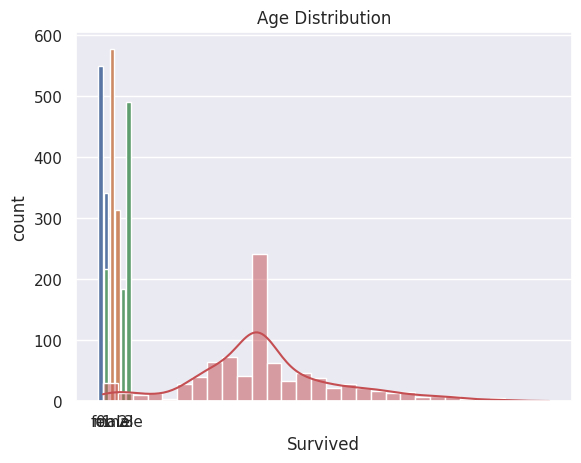

In [7]:
# Survived count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

# Gender distribution
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')

# Pclass distribution
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')

# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")


Text(0.5, 1.0, 'Fare Distribution by Survival')

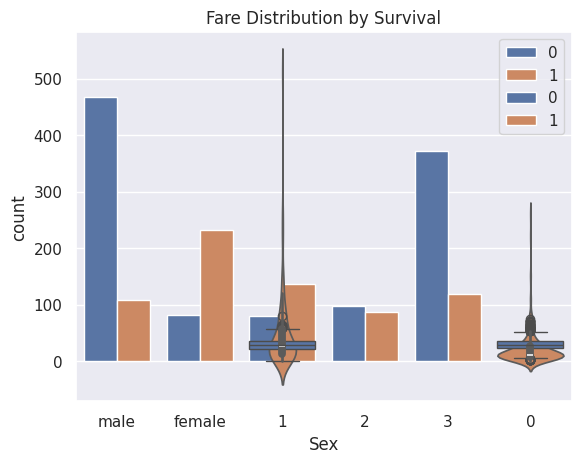

In [8]:
# Survival based on Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Gender')

# Survival based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Class')

# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')

# Fare vs Survived
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')


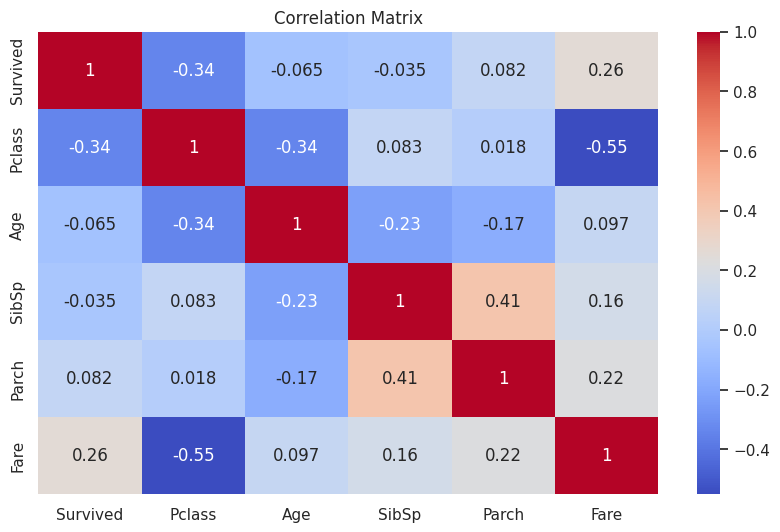

In [11]:
# Option 1 – quick and modern (pandas ≥ 1.5)
corr = df.corr(numeric_only=True)

# Option 2 – works on any pandas version
# numeric_df = df.select_dtypes(include='number')
# corr = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# 🔍 Key Insights from Titanic Dataset

- 💡 **Women** had a significantly higher survival rate than men.
- 💡 **1st Class** passengers were more likely to survive than those in 2nd or 3rd class.
- 💡 **Children (age < 10)** also had better survival rates.
- 💡 People who paid **higher fares** had a better chance of surviving.
- 💡 Passengers who boarded from **Cherbourg (C)** had the highest survival rate among embarkation points.


In [12]:
df.to_csv('cleaned_titanic.csv', index=False)
